# Q26: Entropies and Expectations

In [71]:
import numpy as np
from numpy import inf
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
X = np.array([1, 2])
Y = np.array([-1, 0, 5])
joint_prob_x_y = np.array([[0.3, 0.3, 0.0], [0.1, 0.2, 0.1]])

In [39]:
prob_x = np.sum(joint_prob_x_y, axis = 1)
prob_y = np.sum(joint_prob_x_y, axis = 0)

In [40]:
prob_x_given_y = joint_prob_x_y / prob_y
prob_y_given_x = joint_prob_x_y / np.reshape(prob_x, (-1,1))

In [41]:
print("p(x,y):")
print(joint_prob_x_y)
print("p(x):", prob_x)
print("p(y):", prob_y)
print("p(x|y):")
print(prob_x_given_y)
print("p(y|x):")
print(prob_y_given_x)

p(x,y):
[[0.3 0.3 0. ]
 [0.1 0.2 0.1]]
p(x): [0.6 0.4]
p(y): [0.4 0.5 0.1]
p(x|y):
[[0.75 0.6  0.  ]
 [0.25 0.4  1.  ]]
p(y|x):
[[0.5  0.5  0.  ]
 [0.25 0.5  0.25]]


# 1. Expectations

In [62]:
expected_x = (X * prob_x).sum()
expected_y = (Y * prob_y).sum()
expectec_y_given_x = (np.reshape(X, (-1, 1)) * prob_y_given_x).sum()
expected_x_given_y = (Y * prob_x_given_y).sum()
cov_x_y = 0.0
for i in range(X.size):
    for j in range(Y.size):
        cov_x_y += (X[i]-expected_x)*(Y[j]-expected_y)*joint_prob_x_y[i,j]


In [63]:
print("<X>:", expected_x)
print("<Y>:", expected_y)
print("p(y|x):", expectec_y_given_x)
print("p(x|y):", expected_x_given_y)
print("Cov[x, y]:" , cov_x_y)

<X>: 1.4
<Y>: 0.09999999999999998
p(y|x): 3.0
p(x|y): 4.0
Cov[x, y]: 0.36000000000000004


# 2. Joint Entropy

In [72]:
log_prob_x_y = (np.log(np.array(joint_prob_x_y) + 1e-50))
log_prob_x_y[log_prob_x_y == -inf] = 0
joint_entropy_x_y = - (log_prob_x_y * joint_prob_x_y).sum()

In [67]:
print("H[x,y]:", joint_entropy_x_y)

H[x,y]: 1.5047882836811908


# 3. Marginal Entropies

In [68]:
log_prob_x = (np.log(np.array(prob_x) + 1e-50))
marginal_entropy_x = - (log_prob_x * prob_x).sum()

log_prob_y = (np.log(np.array(prob_y) + 1e-50))
marginal_entropy_y = - (log_prob_y * prob_y).sum()

In [69]:
print("H[x]: ", marginal_entropy_x)
print("H[y]: ", marginal_entropy_y)

H[x]:  0.6730116670092565
H[y]:  0.9433483923290391


# 4. Conditional Entropies

In [73]:
log_prob_y_given_x = (np.log(np.array(prob_y_given_x) + 1e-50))
log_prob_y_given_x[log_prob_y_given_x == -inf] = 0
conditional_entropy_y_given_x = - (log_prob_y_given_x * joint_prob_x_y).sum()

log_prob_x_given_y = (np.log(np.array(prob_x_given_y) + 1e-50))
log_prob_x_given_y[log_prob_y_given_x == -inf] = 0
conditional_entropy_x_given_y = - (log_prob_x_given_y * joint_prob_x_y).sum()


In [74]:
print("H[y|x]: ", conditional_entropy_y_given_x)
print("H[x|y]: ", conditional_entropy_x_given_y)

H[y|x]:  0.8317766166719344
H[x|y]:  0.5614398913521517


# 5. Mutual Information

In [75]:
mutual_information = marginal_entropy_x - conditional_entropy_x_given_y

In [76]:
print("I(x,y): ", mutual_information)

I(x,y):  0.11157177565710485


# 6. Test your program for the following joint probability table

Table is used to test above, please see print statements.

# 7. Verify the picture

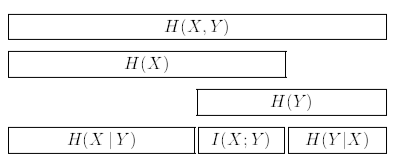

$ H[x] + H[y] \geq H[x,y]$

In [88]:
print("H[x,y] = %.14f" % joint_entropy_x_y)
print("H[x] + H[y] = %.14f" % (marginal_entropy_x + marginal_entropy_y))

H[x,y] = 1.50478828368119
H[x] + H[y] = 1.61636005933830


$I[x,y] = H[y] - H[y|x]$

In [89]:
print("H[y]-H[y|x] = %.14f" % (marginal_entropy_y - conditional_entropy_y_given_x))
print("H[x]-H[x|y] = %.14f" % (marginal_entropy_x - conditional_entropy_x_given_y))
print("I[x,y] = ", mutual_information)

H[y]-H[y|x] = 0.11157177565710
H[x]-H[x|y] = 0.11157177565710
I[x,y] =  0.11157177565710485


$H[x,y] = H[y|x] + H[x]$

In [90]:
print("H[y|x] + H[x] = %.14f" % (conditional_entropy_y_given_x + marginal_entropy_x))
print("H[x|y] + H[y] = %.14f" % (conditional_entropy_x_given_y+ marginal_entropy_y))

H[y|x] + H[x] = 1.50478828368119
H[x|y] + H[y] = 1.50478828368119
